In [ ]:
import numpy as np
import os
import sys
from glob import glob
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

np.set_printoptions(threshold=sys.maxsize)

import sklearn.utils as slu

import seaborn as sns
from sklearn.metrics import *
sns.set()

In [ ]:
# Change path as required - will also save combined synthetic data to this path
path = '/content/drive/MyDrive/ecg/'

In [ ]:
### Use mlii.csv generated by the notebook: Sampling MLII Beats Only for Generative Models in channel split folder
### change any folder suffixes as required.
mlii = np.loadtxt(path+'channel_split/mlii.csv', delimiter=',')

In [ ]:
print(mlii.shape)

(108828, 259)


### Real Beats

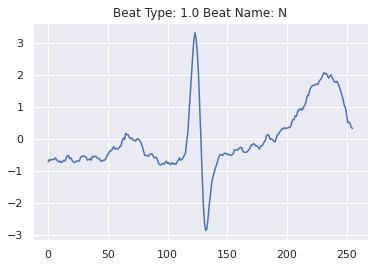

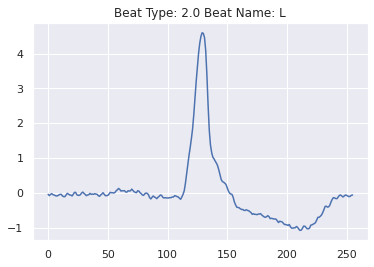

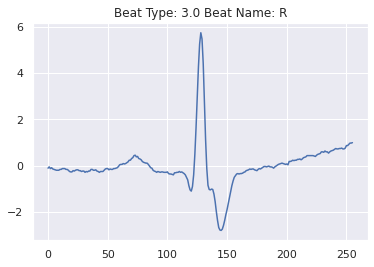

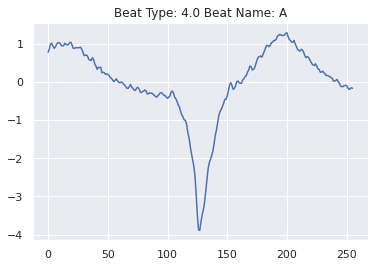

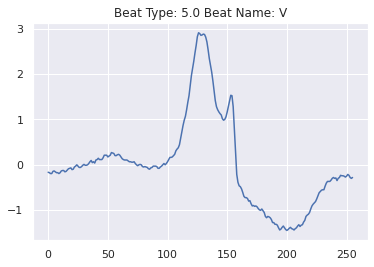

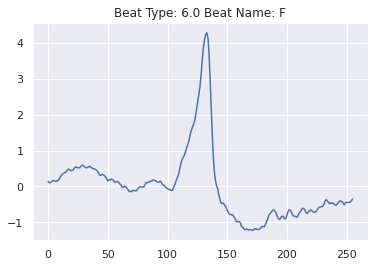

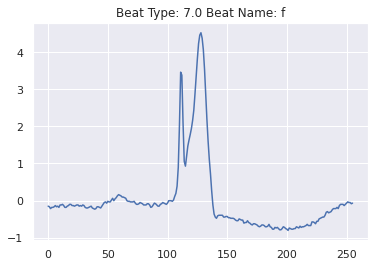

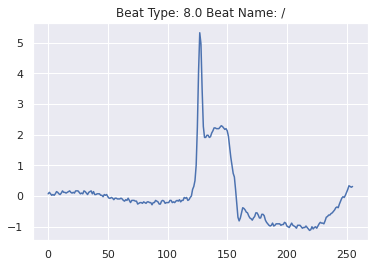

In [ ]:
beat_types = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0]
beat_name = ['N', 'L', 'R', 'A', 'V', 'F', 'f', '/']
for i,j in zip(beat_types,beat_name):
   plt.plot(mlii[:,:-3][np.where(mlii[:,-3]==i)[0]][666])
   plt.title('Beat Type: '+ str(i)+ ' Beat Name: '+ j )
   plt.show()


### Synthetic Data - combining the data generated separately for each class by the VAEs into one file with all data per VAE

In [ ]:
def synthetic_data(file_name):
    path = '/content/drive/MyDrive/ecg/synthetic_data/' + file_name
    file_list = glob(path + '/*.csv')
    data = []
    # labels = np.full((960,1),label)
    labels = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,8.0]
    for i in range(len(file_list)):
      arr = np.genfromtxt(file_list[i], delimiter=',')
      lbl = np.full((arr.shape[0],1),labels[i])
      arr = np.hstack((arr,lbl))
      data.append( arr )
    all_data = np.concatenate(data, axis=0)
    return all_data

In [ ]:
cnn_vae = synthetic_data('conv_vae')
cnn_sparse_vae = synthetic_data('sparse_conv_vae')
lstm_vae = synthetic_data('lstm_vae')
lstm_sparse_vae = synthetic_data('lstm_sparse_vae')

print(cnn_vae.shape)
print(cnn_sparse_vae.shape)
print(lstm_vae.shape)
print(lstm_sparse_vae.shape)

(47616, 257)
(47616, 257)
(47616, 257)
(47616, 257)


In [ ]:
comb = 'synthetic_data/combined/'
if not os.path.exists(path + comb):
  os.makedirs(path + comb)

In [ ]:
np.savetxt(path + comb + 'cnn_synth.csv', cnn_vae, delimiter=',')
np.savetxt(path + comb + 'cnn_sparse_synth.csv', cnn_sparse_vae, delimiter=',')
np.savetxt(path + comb + 'lstm_synth.csv', lstm_vae, delimiter=',')
np.savetxt(path + comb + 'lstm_sparse_synth.csv', lstm_sparse_vae, delimiter=',')

## Visualise Synthetic Beats per VAE model

In [ ]:
comb = path + 'synthetic_data/combined/'
cnn_synth = np.genfromtxt(comb + 'cnn_synth.csv', delimiter=',')
cnn_sparse_synth = np.genfromtxt(comb + 'cnn_sparse_synth.csv', delimiter=',' )
lstm_synth = np.genfromtxt(comb + 'lstm_synth.csv', delimiter=',')
lstm_sparse_synth = np.genfromtxt(comb + 'lstm_sparse_synth.csv', delimiter=',')

print(cnn_synth.shape)
print(cnn_sparse_synth.shape)
print(lstm_synth.shape)
print(lstm_sparse_synth.shape)


(47616, 257)
(47616, 257)
(47616, 257)
(47616, 257)


In [ ]:
def view_sample(model_file, beat_type, beat_no, model_name):
  beats = model_file[:,:-1]
  labels = model_file[:,-1]
  view_data = beats[np.where(labels == beat_type)[0]][beat_no]
  sns.set()
  plt.plot(mlii[:,:-3][np.where(mlii[:,-3]==beat_type)[0]][beat_no])
  plt.plot(view_data)
  plt.title(model_name + ' Synthetic Beat Type: %s' % str(beat_type))
  plt.legend(labels=['real', 'synthetic'])
  plt.show()
  # plt.savefig(path + 'synth_imgs/' + model_name+ '_' + str(beat_type) +'.png')


In [ ]:
def view_beat_per_class(model_file, beat_no, model_name):
  beat_types = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0]
  for i in beat_types:
    view_sample(model_file, i, beat_no, model_name)

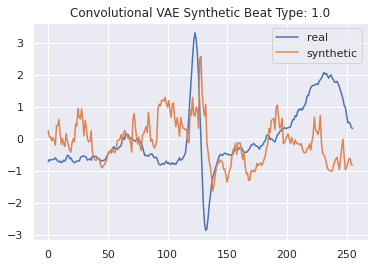

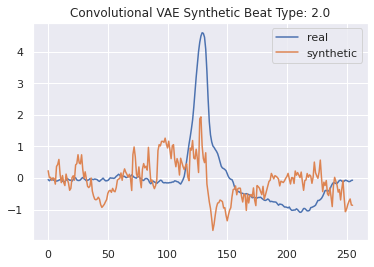

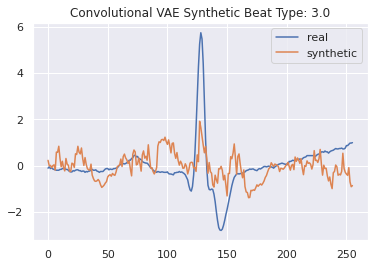

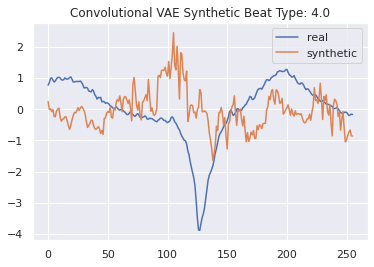

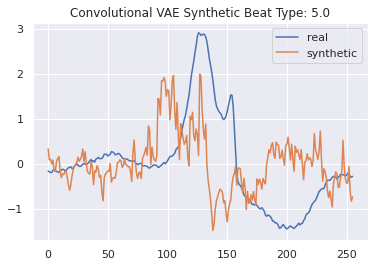

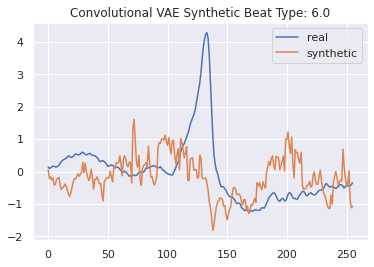

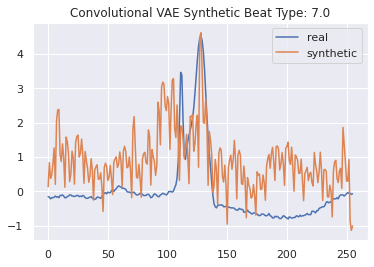

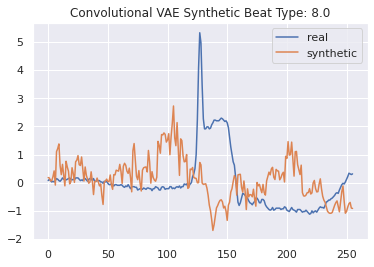

In [ ]:
view_beat_per_class(cnn_synth, 666, "Convolutional VAE")

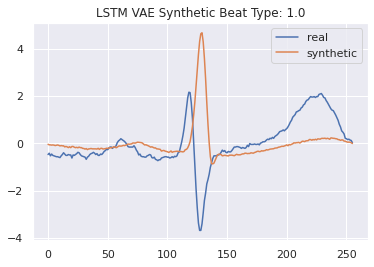

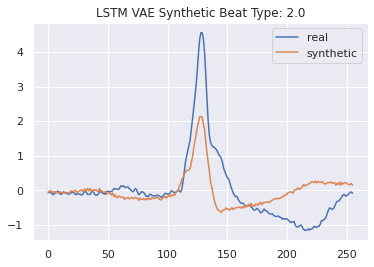

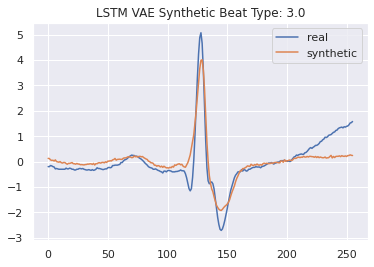

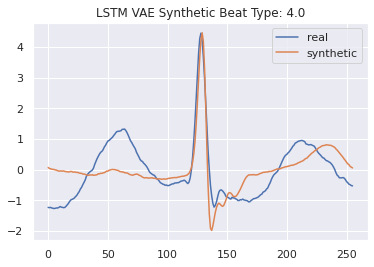

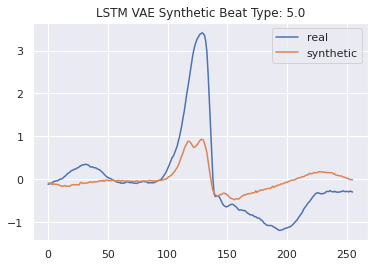

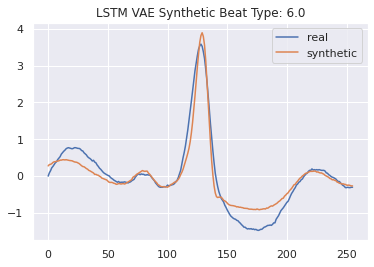

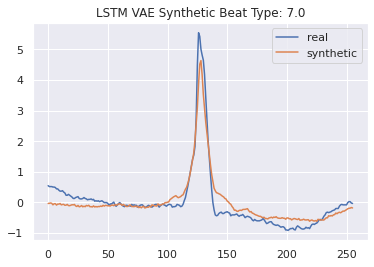

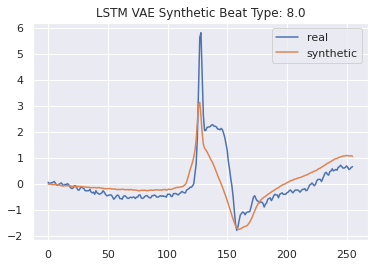

In [ ]:
view_beat_per_class(lstm_synth, 666, "LSTM VAE")

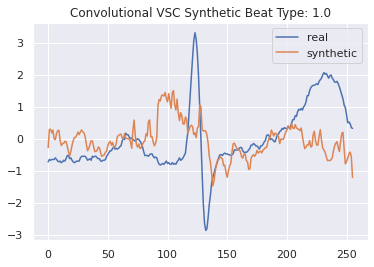

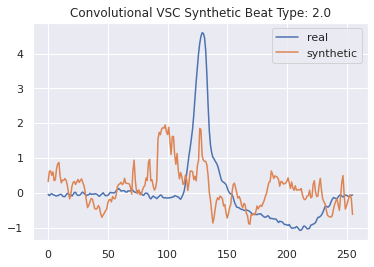

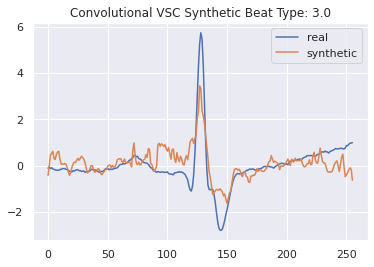

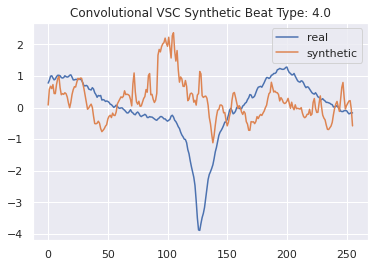

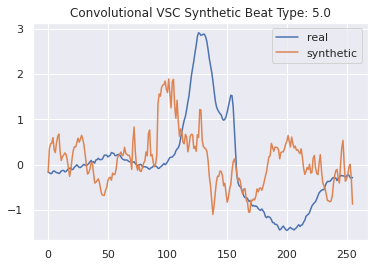

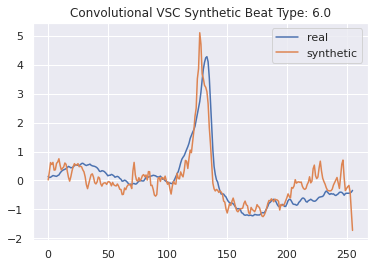

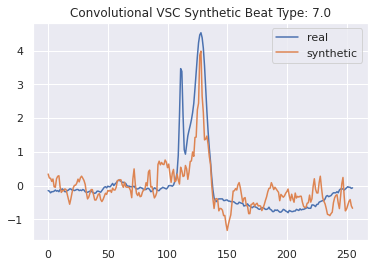

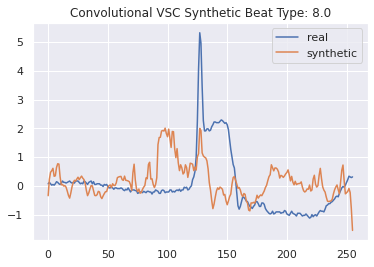

In [ ]:
view_beat_per_class(cnn_sparse_synth, 666, "Convolutional VSC")

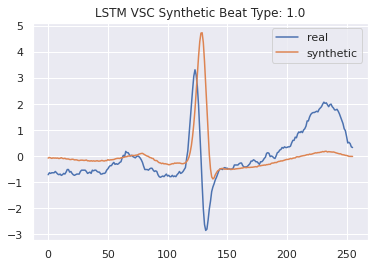

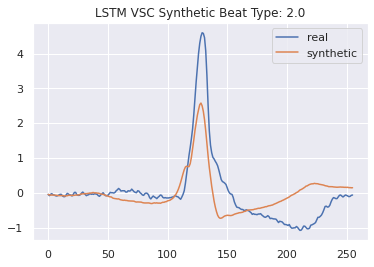

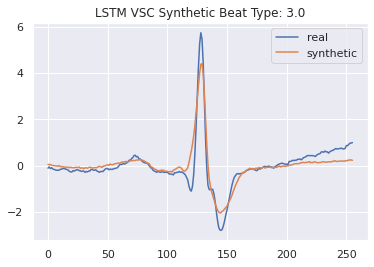

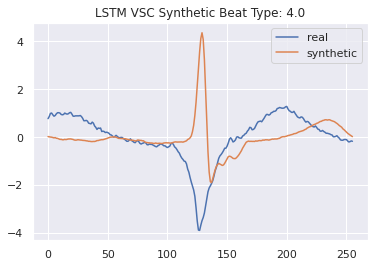

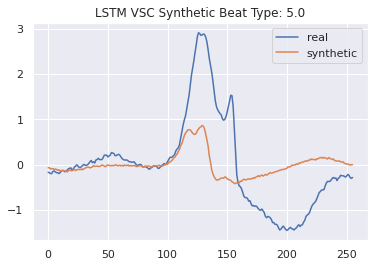

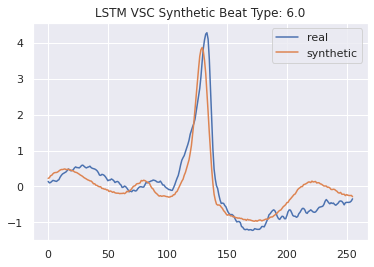

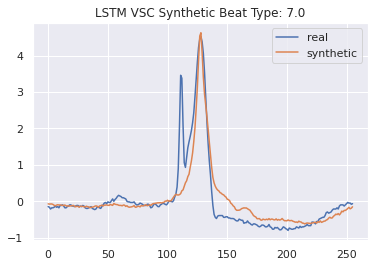

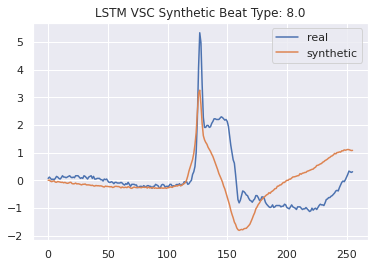

In [ ]:
view_beat_per_class(lstm_sparse_synth, 666, "LSTM VSC")